# Appendix - Code

## Import libraries

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

---

## Load Iris Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

---

## Split into training and test dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

---

## PCA

### Applying PCA

In [5]:
n_components=4

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
y_pca_train, y_pca_test = y_train, y_test

### Analysing PCA Results

In [7]:
if n_components==2:
    colors = {0: "maroon", 1: "black", 2: "darkorange"}
    plt.figure(figsize=(5, 3))
    for X, y in zip(X_pca_train, y_pca_train):
        plt.scatter(X[0], X[1], color=colors[y], edgecolors="black", alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

In [8]:
pca.get_covariance()

array([[ 0.60335504, -0.04913866,  1.14694118,  0.47295378],
       [-0.04913866,  0.2047479 , -0.37621849, -0.14415966],
       [ 1.14694118, -0.37621849,  2.97192157,  1.24180392],
       [ 0.47295378, -0.14415966,  1.24180392,  0.5575098 ]])

In [9]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92144673, 0.05709714, 0.01564435, 0.00581179])

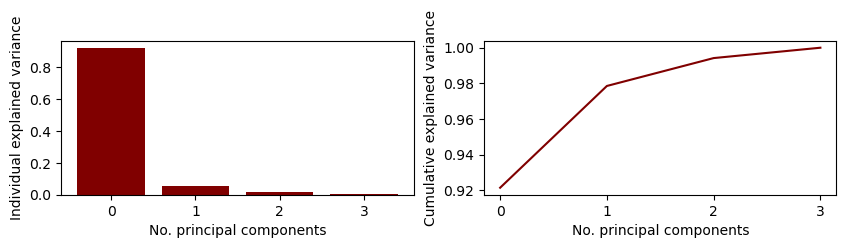

In [10]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.bar(range(len(explained_variance)), explained_variance, align='center', 
        color="maroon")
plt.ylabel('Individual explained variance')
plt.xlabel('No. principal components')
plt.xticks(list(range(len(explained_variance))))
plt.subplot(1, 2, 2)
plt.plot(np.cumsum((explained_variance)), color="maroon")
plt.xticks(list(range(len(explained_variance))))
plt.ylabel('Cumulative explained variance')
plt.xlabel('No. principal components')
plt.show()

---

## Classification

### kNN (k=1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_pca_train, y_pca_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
knn1_score_pca_train = knn1.score(X_pca_train, y_pca_train)
knn1_score_pca_test = knn1.score(X_pca_test, y_pca_test)

In [13]:
print(f"Train score with PCA: {knn1_score_pca_train}")
print(f"Test score with PCA: {knn1_score_pca_test}")

Train score with PCA: 1.0
Test score with PCA: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



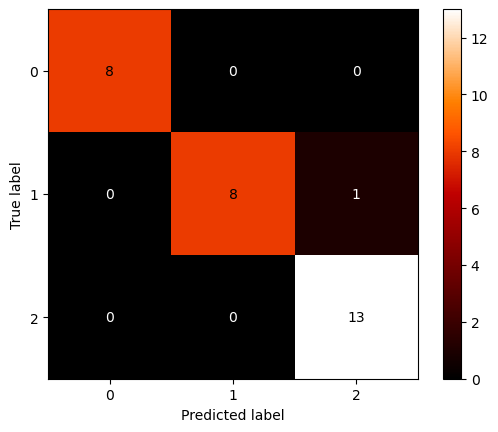

In [14]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_pca_pred = knn1.predict(X_pca_test)
print(classification_report(y_pca_test, y_pca_pred))
plot_confusion_matrix(knn1, X_pca_test, y_pca_test, cmap="gist_heat")
# plt.savefig(f"poze/result_1knn_{n_components}comp_classification_matrix.jpg")
plt.show()

### kNN (k=3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(3)
knn3.fit(X_pca_train, y_pca_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn3_score_pca_train = knn3.score(X_pca_train, y_pca_train)
knn3_score_pca_test = knn3.score(X_pca_test, y_pca_test)

In [17]:
print(f"Train score with PCA: {knn3_score_pca_train}")
print(f"Test score with PCA: {knn3_score_pca_test}")

Train score with PCA: 0.9583333333333334
Test score with PCA: 0.9666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



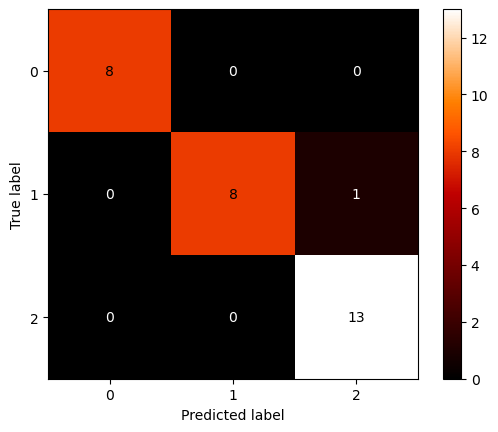

In [18]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_pca_pred = knn3.predict(X_pca_test)
print(classification_report(y_pca_test, y_pca_pred))
plot_confusion_matrix(knn3, X_pca_test, y_pca_test, cmap="gist_heat")
# plt.savefig(f"poze/result_3knn_{n_components}comp_classification_matrix.jpg")
plt.show()

### Supervised k-Means

In [19]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_pca_train, y_pca_train)

NearestCentroid()

In [20]:
nc_score_train = nc.score(X_pca_train, y_pca_train)
nc_score_test = nc.score(X_pca_test, y_pca_test)

In [21]:
print(f"Train score with PCA: {nc_score_train}")
print(f"Test score with PCA: {nc_score_test}")

Train score with PCA: 0.9416666666666667
Test score with PCA: 0.8666666666666667


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.56      0.71         9
           2       0.76      1.00      0.87        13

    accuracy                           0.87        30
   macro avg       0.92      0.85      0.86        30
weighted avg       0.90      0.87      0.86        30



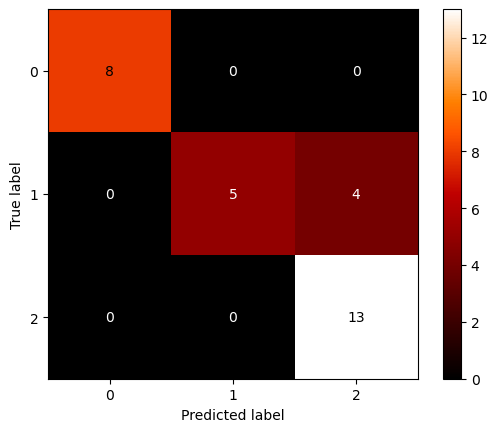

In [22]:
from sklearn.metrics import plot_confusion_matrix, classification_report
y_pca_pred = nc.predict(X_pca_test)
print(classification_report(y_pca_test, y_pca_pred))
plot_confusion_matrix(nc, X_pca_test, y_pca_test, cmap="gist_heat")
# plt.savefig(f"poze/result_nc_{n_components}comp_classification_matrix.jpg")
plt.show()

### GridSearch

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

model_params = {
    '1KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1],
            'metric': ["minkowski", "euclidean", "manhattan", "chebyshev", "cosine", "hamming", "canberra", "braycurtis"]
        }
    },
    '3KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3],
            'metric': ["minkowski", "euclidean", "manhattan", "chebyshev", "cosine", "hamming", "canberra", "braycurtis"]
        }
    }, 
    'NC' : {
        'model': NearestCentroid(),
        'params': {
            'metric': ["minkowski", "euclidean", "manhattan", "chebyshev", "cosine", "hamming", "canberra", "braycurtis"]
        }
    }
    
}

In [25]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=20, return_train_score=True, verbose=3)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])

Fitting 20 folds for each of 8 candidates, totalling 160 fits
[CV 1/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 5/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 7/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 8/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 9/20] END metric=minkowski, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 10/20] END metric=minkowski, n_neighbors=1;

[CV 17/20] END metric=hamming, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 18/20] END metric=hamming, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 19/20] END metric=hamming, n_neighbors=1;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 20/20] END metric=hamming, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 1/20] END metric=canberra, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/20] END metric=canberra, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/20] END metric=canberra, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/20] END metric=canberra, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 5/20] END metric=canberra, n_neighbors=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 6/20] END metric=canberra, n_neighbors=1;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 7/20] END metric

[CV 5/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 6/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 7/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 8/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 9/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 10/20] END metric=cosine, n_neighbors=3;, score=(train=0.974, test=1.000) total time=   0.0s
[CV 11/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 12/20] END metric=cosine, n_neighbors=3;, score=(train=0.991, test=1.000) total time=   0.0s
[CV 13/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=0.833) total time=   0.0s
[CV 14/20] END metric=cosine, n_neighbors=3;, score=(train=0.982, test=1.000) total time=   0.0s
[CV 15/20] END metric=cosine, n_nei

[CV 16/20] END metric=canberra;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 17/20] END metric=canberra;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 18/20] END metric=canberra;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 19/20] END metric=canberra;, score=(train=0.947, test=0.833) total time=   0.0s
[CV 20/20] END metric=canberra;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 1/20] END metric=braycurtis;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 2/20] END metric=braycurtis;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 3/20] END metric=braycurtis;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 4/20] END metric=braycurtis;, score=(train=0.965, test=0.833) total time=   0.0s
[CV 5/20] END metric=braycurtis;, score=(train=0.939, test=1.000) total time=   0.0s
[CV 6/20] END metric=braycurtis;, score=(train=0.939, test=0.833) total time=   0.0s
[CV 7/20] END metric=braycurtis;, score=(train=0.939, test=1.000) tota

In [26]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df_score)

  model  best_score                                best_params
0  1KNN    0.958333  {'metric': 'minkowski', 'n_neighbors': 1}
1  3KNN    0.975000     {'metric': 'cosine', 'n_neighbors': 3}
2    NC    0.975000                       {'metric': 'cosine'}
